<a href="https://colab.research.google.com/github/Jasxpreet/Data-Science-Assignments/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset:** [Amazon Fine Food Reviews](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews)

The dataset contains 500,000+ food reviews from Amazon



---



# Task 1: Data Preprocessing

**1.1 Load and Explore Dataset**



*   Load dataset using pandas and display sample reviews.
*   Convert 5-star ratings into binary sentiment labels (positive = 4, 5; negative = 1, 2, 3).


In [ ]:
import shutil
import os

# Make sure the .kaggle directory exists
os.makedirs('/root/.kaggle', exist_ok=True)

# Move kaggle.json to the correct location
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Set permissions
os.chmod("/root/.kaggle/kaggle.json", 600)

In [ ]:
! kaggle datasets download snap/amazon-fine-food-reviews

Dataset URL: https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
License(s): CC0-1.0


In [ ]:
#!/bin/bash
!kaggle datasets download kadircandrisolu/birdclef25-mel-spectrograms

Dataset URL: https://www.kaggle.com/datasets/kadircandrisolu/birdclef25-mel-spectrograms
License(s): MIT


In [ ]:
!unzip amazon-fine-food-reviews.zip

Archive:  amazon-fine-food-reviews.zip
  inflating: Reviews.csv             
  inflating: database.sqlite         
  inflating: hashes.txt              


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Reviews.csv")

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
df[['Score', 'Text']].head()

,Score,Text
0,5,I have bought several of the Vitality canned d...
1,1,Product arrived labeled as Jumbo Salted Peanut...
2,4,This is a confection that has been around a fe...
3,2,If you are looking for the secret ingredient i...
4,5,Great taffy at a great price. There was a wid...


In [ ]:
df.shape

(568454, 10)

In [ ]:
df.isnull().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [ ]:
df['Score'].value_counts().sort_index()

,count
Score,
1,52268
2,29769
3,42640
4,80655
5,363122


In [ ]:
df['Sentiment']=np.where(df['Score']>=4,1,0) #binary sentiment labels

In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1


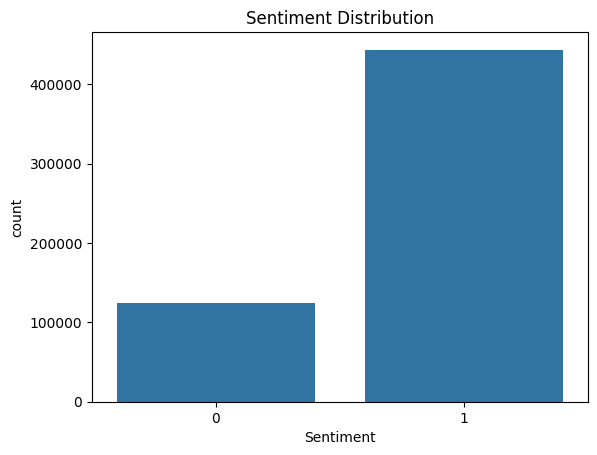

In [ ]:
sns.countplot(x=df['Sentiment'])
plt.title("Sentiment Distribution")
plt.show()

**1.2 Text Cleaning**


*   Convert Text to lowercase.  
*   Remove punctuation, special characters, and stopwords.

In [ ]:
df['Text'] = df['Text'].str.lower()
df['Text_clean'] = df['Text'].str.replace('[^a-zA-Z ]', '', regex=True)

In [ ]:
df['Text_clean'][0]

'i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than  most'

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
stop_words=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
df['Text_clean']=df['Text_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [ ]:
df['Text_clean'][0]

'bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better'


**1.3 Stemming & Lemmatization**

*   Apply PorterStemmer and WordNetLemmatizer.
*   Compare their effects on sample text.

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
stemmer=PorterStemmer()
lemmatizer=WordNetLemmatizer()

In [ ]:
def stem_text(text):
  return ' '.join([stemmer.stem(word) for word in text.split()])
def lemmatize_text(text):
  return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [ ]:
df['Stemmed_Text'] = df['Text_clean'].apply(stem_text)
df['Lemmatized_Text'] = df['Text_clean'].apply(lemmatize_text)

In [ ]:
df[['Text_clean','Stemmed_Text','Lemmatized_Text']].head()

,Text_clean,Stemmed_Text,Lemmatized_Text
0,bought several vitality canned dog food produc...,bought sever vital can dog food product found ...,bought several vitality canned dog food produc...
1,product arrived labeled jumbo salted peanutsth...,product arriv label jumbo salt peanutsth peanu...,product arrived labeled jumbo salted peanutsth...
2,confection around centuries light pillowy citr...,confect around centuri light pillowi citru gel...,confection around century light pillowy citrus...
3,looking secret ingredient robitussin believe f...,look secret ingredi robitussin believ found go...,looking secret ingredient robitussin believe f...
4,great taffy great price wide assortment yummy ...,great taffi great price wide assort yummi taff...,great taffy great price wide assortment yummy ...


#Task 2: Feature Extraction & Traditional Models

**2.1 Bag of Words (BoW)**


*   Convert text into BoW representation using CountVectorizer.
*   Train a Naïve Bayes classifier and evaluate accuracy.


In [ ]:
!pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df['Text_clean'])
y=df['Sentiment']

In [ ]:
y

,Sentiment
0,1
1,0
2,1
3,0
4,1
...,...
568449,1
568450,0
568451,1
568452,1


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
nb_model=MultinomialNB()
nb_model.fit(X_train,y_train)
y_pred=nb_model.predict(X_test)
nb_accuracy=accuracy_score(y_test,y_pred)

In [ ]:
print("Naive Bayes Accuracy: ",nb_accuracy)

Naive Bayes Accuracy:  0.8788734376511773


**2.2 N-grams**



*   Extract unigrams, bigrams, and trigrams.
*   Identify the most common n-grams in positive and negative reviews.

In [ ]:
vectorizer_unigram = CountVectorizer(ngram_range=(1,1))
vectorizer_bigram = CountVectorizer(ngram_range=(2,2))
vectorizer_trigram = CountVectorizer(ngram_range=(3,3))

X_unigram = vectorizer_unigram.fit_transform(df['Text_clean'])
X_bigram = vectorizer_bigram.fit_transform(df['Text_clean'])
X_trigram = vectorizer_trigram.fit_transform(df['Text_clean'])

# Function to get top n-grams
def get_top_ngrams(vectorizer, X, n=10):
    sum_words = X.sum(axis=0).A1  # Convert sparse matrix to 1D array
    words_freq = sorted(vectorizer.vocabulary_.items(), key=lambda x: sum_words[x[1]], reverse=True)
    return words_freq[:n]

print("Top Unigrams:", get_top_ngrams(vectorizer_unigram, X_unigram))
print("Top Bigrams:", get_top_ngrams(vectorizer_bigram, X_bigram))
print("Top Trigrams:", get_top_ngrams(vectorizer_trigram, X_trigram))


Top Unigrams: [('br', 21752), ('like', 114717), ('good', 79837), ('one', 139579), ('taste', 195513), ('great', 81746), ('coffee', 37325), ('product', 156391), ('flavor', 70086), ('tea', 196475)]
Top Bigrams: [('taste like', 3981122), ('highly recommend', 1894160), ('peanut butter', 2907937), ('ive tried', 2085544), ('green tea', 1773233), ('dog food', 1155261), ('grocery store', 1784564), ('tastes like', 3991391), ('much better', 2584855), ('gluten free', 1697251)]
Top Trigrams: [('local grocery store', 6114663), ('would highly recommend', 11839182), ('highly recommend product', 5046399), ('health food store', 4942004), ('high fructose corn', 5032246), ('fructose corn syrup', 4242022), ('cant go wrong', 1612782), ('goes long way', 4508911), ('would recommend anyone', 11853176), ('would definitely recommend', 11828933)]


In [ ]:
# Separate Positive and Negative Reviews
positive_reviews = df[df['Sentiment'] == 1]['Text_clean']
negative_reviews = df[df['Sentiment'] == 0]['Text_clean']

# Fit & Transform for Positive Sentiments
X_unigram_pos = vectorizer_unigram.fit_transform(positive_reviews)
X_bigram_pos = vectorizer_bigram.fit_transform(positive_reviews)
X_trigram_pos = vectorizer_trigram.fit_transform(positive_reviews)

# Fit & Transform for Negative Sentiments
X_unigram_neg = vectorizer_unigram.fit_transform(negative_reviews)
X_bigram_neg = vectorizer_bigram.fit_transform(negative_reviews)
X_trigram_neg = vectorizer_trigram.fit_transform(negative_reviews)

# Print Top N-grams
print("Top Positive Unigrams:", get_top_ngrams(vectorizer_unigram, X_unigram_pos))
print("Top Positive Bigrams:", get_top_ngrams(vectorizer_bigram, X_bigram_pos))
print("Top Positive Trigrams:", get_top_ngrams(vectorizer_trigram, X_trigram_pos))

print("Top Negative Unigrams:", get_top_ngrams(vectorizer_unigram, X_unigram_neg))
print("Top Negative Bigrams:", get_top_ngrams(vectorizer_bigram, X_bigram_neg))
print("Top Negative Trigrams:", get_top_ngrams(vectorizer_trigram, X_trigram_neg))


Top Positive Unigrams: [('counterparts', 18025), ('recipeand', 66849), ('restoring', 68487), ('freezertype', 31088), ('overwhat', 58645), ('peanutsthe', 60150), ('puedo', 64999), ('aspartine', 4254), ('lemonadelike', 46358), ('chinai', 13896)]
Top Positive Bigrams: [('understand deliver', 1519468), ('taste yucky', 1421396), ('tea th', 1430680), ('much soft', 919660), ('stick beneful', 1358027), ('tanka buffalo', 1415496), ('leaked picture', 781707), ('fall companybr', 502126), ('times damn', 1470510), ('nearly aount', 930496)]
Top Positive Trigrams: [('good made china', 1226937), ('youd think straight', 3243884), ('doesnt aside pretty', 800053), ('pack delivery clean', 2033556), ('good like really', 1226453), ('good reordering gone', 1231425), ('even ordered kids', 931014), ('dishes ive also', 793837), ('reputable sources remember', 2362522), ('reviewers experience seem', 2382190)]
Top Negative Unigrams: [('br', 9098), ('like', 46882), ('taste', 80993), ('product', 64242), ('would', 91

**2.3 TF-IDF Transformation**


*   Apply TF-IDF vectorization using TfidfVectorizer.
*   Train a Logistic Regression model on TF-IDF features and compare accuracy.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['Text_clean'])

TF-IDF stands for:


*   Term Frequency (TF) → How often a word appears in a document
*   Inverse Document Frequency (IDF) → How rare or unique that word is across all documents






In [ ]:
y=df['Sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
lr_accuracy=accuracy_score(y_test,y_pred)

In [ ]:
print("Logistic Regression Accuracy: ",lr_accuracy)

Logistic Regression Accuracy:  0.9005638089206709


# Task 3: Word Embeddings & Visualization

**3.1 Word2Vec**



*   Train a Word2Vec model on Amazon reviews using gensim.
*   Compare the CBOW and Skip-gram architectures.

*   Find words similar to "delicious," "bad," "sweet".
*   Visualize embeddings using t-SNE.











In [ ]:
!pip install --upgrade --force-reinstall numpy gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 70.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: smart-open
    Found existing installation: 

In [ ]:
from gensim.models import Word2Vec

In [ ]:
df['Text_clean']

,Text_clean
0,bought several vitality canned dog food produc...
1,product arrived labeled jumbo salted peanutsth...
2,confection around centuries light pillowy citr...
3,looking secret ingredient robitussin believe f...
4,great taffy great price wide assortment yummy ...
...,...
568449,great sesame chickenthis good better resturant...
568450,im disappointed flavor chocolate notes especia...
568451,stars small give one training session tried tr...
568452,best treats training rewarding dog good groomi...


In [ ]:
sentences=[row.split() for row in df['Text_clean']]

In [ ]:
sentences[1]

['product',
 'arrived',
 'labeled',
 'jumbo',
 'salted',
 'peanutsthe',
 'peanuts',
 'actually',
 'small',
 'sized',
 'unsalted',
 'sure',
 'error',
 'vendor',
 'intended',
 'represent',
 'product',
 'jumbo']

In [ ]:
cbow_model=Word2Vec(sentences=sentences,vector_size=100,window=5,min_count=5,sg=0)

In [ ]:
skipgram_model=Word2Vec(sentences=sentences,vector_size=100,window=5,min_count=5,sg=1)

In [ ]:
print("CBOW Similarity:")
print("Delicious:", cbow_model.wv.most_similar("delicious"))
print("Bad:", cbow_model.wv.most_similar("bad"))
print("Sweet:", cbow_model.wv.most_similar("sweet"))

CBOW Similarity:
Delicious: [('yummy', 0.8320692181587219), ('delish', 0.7771746516227722), ('tasty', 0.7745160460472107), ('wonderful', 0.762824535369873), ('fabulous', 0.7223785519599915), ('fantastic', 0.7202173471450806), ('scrumptious', 0.7172307968139648), ('delightful', 0.709026575088501), ('divine', 0.7021206617355347), ('awesome', 0.6830537915229797)]
Bad: [('terrible', 0.7602590918540955), ('horrible', 0.6982033848762512), ('nasty', 0.6713618040084839), ('weird', 0.6679612994194031), ('awful', 0.6671229600906372), ('gross', 0.6549709439277649), ('good', 0.6491007804870605), ('ok', 0.6347518563270569), ('repulsive', 0.6045219302177429), ('funny', 0.5968866944313049)]
Sweet: [('sweetbr', 0.7557771801948547), ('sweetness', 0.7117595076560974), ('sugary', 0.691983699798584), ('sweetened', 0.6468933820724487), ('sweetish', 0.6193652153015137), ('sweeter', 0.6173475980758667), ('lemony', 0.6108807325363159), ('fruity', 0.6093533635139465), ('cloying', 0.5949755311012268), ('tangy',

In [ ]:
print("Skipgram Similarity:")
print("Delicious:", skipgram_model.wv.most_similar("delicious"))
print("Bad:", skipgram_model.wv.most_similar("bad"))
print("Sweet:", skipgram_model.wv.most_similar("sweet"))

Skipgram Similarity:
Delicious: [('yummy', 0.8751314878463745), ('tasty', 0.855830192565918), ('flavorful', 0.7851705551147461), ('delicous', 0.7844623327255249), ('deliciousi', 0.7830936312675476), ('scrumptious', 0.7810283899307251), ('fantastic', 0.7725691199302673), ('delish', 0.765140950679779), ('fabulous', 0.7600635290145874), ('deliciousbr', 0.7584143280982971)]
Bad: [('terrible', 0.7416214942932129), ('joecaffeine', 0.682880699634552), ('oldestworst', 0.6802384853363037), ('unfresh', 0.6677255034446716), ('eitherit', 0.663273274898529), ('purhaps', 0.6615713238716125), ('nutcant', 0.6614322066307068), ('dietfood', 0.6610296964645386), ('good', 0.6596686840057373), ('awful', 0.6552340388298035)]
Sweet: [('sicky', 0.7753680348396301), ('coconutnot', 0.7627138495445251), ('sweetness', 0.7618464827537537), ('sweetbr', 0.7451615333557129), ('sugary', 0.7339246273040771), ('saltysatifies', 0.7298339605331421), ('lowsince', 0.7249325513839722), ('sweetthe', 0.713458240032196), ('over

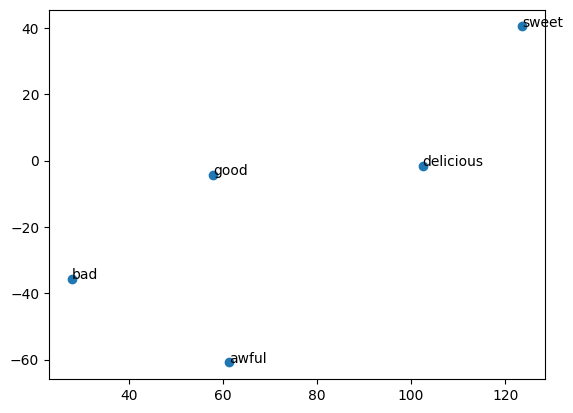

In [ ]:
from sklearn.manifold import TSNE

words = ['delicious', 'bad', 'sweet', 'good', 'awful']
embeddings = [cbow_model.wv[word] for word in words]


embeddings = np.array(embeddings)

tsne = TSNE(n_components=2, random_state=42, perplexity=3)
embeddings_2d = tsne.fit_transform(embeddings)

plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.show()

**3.2 GloVe Embeddings**


*   Load pre-trained GloVe embeddings (glove.6B.100d.txt).
*   Compare word similarities with Word2Vec results.


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2025-04-04 09:45:34--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-04-04 09:45:34--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-04-04 09:45:34--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors

glove_input='/content/glove.6B.100d.txt'
word2vec_output='glove.6B.100d.word2vec'
glove2word2vec(glove_input,word2vec_output)

glove_model=KeyedVectors.load_word2vec_format(word2vec_output,binary=False)

<ipython-input-13-0943c8a98a33>:6: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_input,word2vec_output)


In [ ]:
print("GloVe Similar to 'bad':", glove_model.most_similar('bad', topn=5))

GloVe Similar to 'bad': [('worse', 0.7929712533950806), ('good', 0.7702797651290894), ('things', 0.7653602957725525), ('too', 0.7630148530006409), ('thing', 0.7609668374061584)]


#Task 4: Deep Learning Models

**4.1 LSTM for Sentiment Classification (Learned Embeddings)**


*   Tokenize text and pad sequences using Tokenizer and pad_sequences.
*   Use TensorFlow's Embedding Layer to learn word representations dynamically.
*   Build an LSTM model for binary sentiment classification.
*   Train and evaluate accuracy.





In [ ]:
!pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense,SpatialDropout1D

In [ ]:
tokenizer=Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df["Text_clean"])
X_seq = tokenizer.texts_to_sequences(df['Text_clean'])
X_pad = pad_sequences(X_seq, maxlen=100)
y=df['Sentiment']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_pad,y,test_size=0.2,random_state=42)

In [ ]:
model=Sequential([
    Embedding(input_dim=5000,output_dim=128,input_length=100),
    SpatialDropout1D(0.2),
    LSTM(100,dropout=0.2,recurrent_dropout=0.2),
    Dense(1,activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['Accuracy'])
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)
print("LSTM model Accuracy: ",model.evaluate(X_test,y_test)[1])

Epoch 1/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 1301s 183ms/step - Accuracy: 0.8701 - loss: 0.3087 - val_Accuracy: 0.9011 - val_loss: 0.2408
Epoch 2/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 1297s 183ms/step - Accuracy: 0.9060 - loss: 0.2305 - val_Accuracy: 0.9077 - val_loss: 0.2284
Epoch 3/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 1296s 182ms/step - Accuracy: 0.9178 - loss: 0.2054 - val_Accuracy: 0.9148 - val_loss: 0.2152
Epoch 4/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 1293s 182ms/step - Accuracy: 0.9260 - loss: 0.1869 - val_Accuracy: 0.9198 - val_loss: 0.2070
Epoch 5/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 1294s 182ms/step - Accuracy: 0.9336 - loss: 0.1717 - val_Accuracy: 0.9224 - val_loss: 0.2093
3553/3553 ━━━━━━━━━━━━━━━━━━━━ 90s 25ms/step - Accuracy: 0.9210 - loss: 0.2132
LSTM model Accuracy:  0.9224300980567932



**4.2 LSTM with Pre-trained GloVe Embeddings**

*   Replace the learned embedding layer with GloVe embeddings.
*   Train and compare accuracy with the previous LSTM model.


In [ ]:
embedding_matrix = np.zeros((5000, 100))
for word, i in tokenizer.word_index.items():
    if i < 5000:
        if word in glove_model:
            embedding_matrix[i] = glove_model[word]

In [ ]:
model_glove=Sequential([
    Embedding(input_dim=5000,output_dim=100,weights=[embedding_matrix],trainable=False),
    SpatialDropout1D(0.2),
    LSTM(100,dropout=0.2,recurrent_dropout=0.2),
    Dense(1,activation="sigmoid")
])

In [ ]:
model_glove.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['Accuracy'])
model_glove.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)


Epoch 1/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 1809s 253ms/step - Accuracy: 0.8207 - loss: 0.4017 - val_Accuracy: 0.8798 - val_loss: 0.2829
Epoch 2/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 1884s 265ms/step - Accuracy: 0.8672 - loss: 0.3089 - val_Accuracy: 0.8899 - val_loss: 0.2626
Epoch 3/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 2040s 279ms/step - Accuracy: 0.8773 - loss: 0.2888 - val_Accuracy: 0.8959 - val_loss: 0.2493
Epoch 4/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 1857s 261ms/step - Accuracy: 0.8821 - loss: 0.2782 - val_Accuracy: 0.8990 - val_loss: 0.2441
Epoch 5/5
7106/7106 ━━━━━━━━━━━━━━━━━━━━ 1815s 252ms/step - Accuracy: 0.8853 - loss: 0.2720 - val_Accuracy: 0.8980 - val_loss: 0.2446


NameError: name 'model' is not defined

In [ ]:
print("LSTM model with Glove Accuracy: ",model_glove.evaluate(X_test,y_test)[1])

3553/3553 ━━━━━━━━━━━━━━━━━━━━ 168s 47ms/step - Accuracy: 0.8974 - loss: 0.2475
LSTM model with Glove Accuracy:  0.8980306386947632
